# SQuAD v2 simple categorisation

- Wh- questions __[DONE]__
- Answerable vs. unanswerable __[DONE]__
- Answer types
- Context length __[DONE]__
- Question length __[DONE]__
- Answer length __[DONE]__
- TREC question classification?
- The ones we already have manually labelled
- Manual labelling of a diagnostic AdversarialQA dataset?
- Evaluate on MRQA datasets
- Type consistency (from undersensitivity paper)?
- Clustering (e.g. DBScan)
- Clustering based on learning trajectories
- Item Response Theory
- Fully-trained uncertainty buckets
- CheckList

## Questions

- Why do some examples have only 1/2 answers - wasn't there a minimum number of answers needed?
- Compare distributions of various classes of question between training and dev set

Resolved:
- Dev set has more than one answer - confirm which is used for computing metrics
    - A: "We take the maximum F1 over all of the ground truth answers for a given question, and then average over all of the questions." (SQuAD v1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import spacy
import os

nlp = spacy.load('en_core_web_sm')

In [2]:
os.chdir('../..')

In [3]:
squad_v2_val = load_dataset('squad_v2', split='validation')

Reusing dataset squad_v2 (/Users/stevengeorge/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/ba48bc29b974701e9ba8d80ac94f3e3df924aba41b764dcf9851debea7c672e4)


In [4]:
squad_v2_val

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 11873
})

In [5]:
squad_v2_val_df = pd.DataFrame(squad_v2_val)
print(squad_v2_val_df.shape)
squad_v2_val_df.head()

(11873, 5)


,answers,context,id,question,title
0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9628,In what country is Normandy located?,Normans
1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9629,When were the Normans in Normandy?,Normans
2,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962a,From which countries did the Norse originate?,Normans
3,"{'answer_start': [308, 308, 308, 308], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962b,Who was the Norse leader?,Normans
4,"{'answer_start': [671, 649, 671, 671], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,Normans


In [6]:
squad_v2_val_df['id'].nunique()

11873

In [7]:
squad_v2_val_df.loc[1]['answers']

{'answer_start': [94, 87, 94, 94],
 'text': ['10th and 11th centuries',
  'in the 10th and 11th centuries',
  '10th and 11th centuries',
  '10th and 11th centuries']}

In [8]:
print(squad_v2_val_df.loc[1]['context'][94:])
print('\n')
print(squad_v2_val_df.loc[1]['context'][87:])

10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the native Frankish and Roman-Gaulish populations, their descendants would gradually merge with the Carolingian-based cultures of West Francia. The distinct cultural and ethnic identity of the Normans emerged initially in the first half of the 10th century, and it continued to evolve over the succeeding centuries.


in the 10th and 11th centuries gave their name to Normandy, a region in France. They were descended from Norse ("Norman" comes from "Norseman") raiders and pirates from Denmark, Iceland and Norway who, under their leader Rollo, agreed to swear fealty to King Charles III of West Francia. Through generations of assimilation and mixing with the nativ

In [9]:
squad_v2_val_df = pd.concat((squad_v2_val_df, squad_v2_val_df['answers'].apply(pd.Series)), axis=1)
squad_v2_val_df.head()

,answers,context,id,question,title,answer_start,text
0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9628,In what country is Normandy located?,Normans,"[159, 159, 159, 159]","[France, France, France, France]"
1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9629,When were the Normans in Normandy?,Normans,"[94, 87, 94, 94]","[10th and 11th centuries, in the 10th and 11th..."
2,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962a,From which countries did the Norse originate?,Normans,"[256, 256, 256, 256]","[Denmark, Iceland and Norway, Denmark, Iceland..."
3,"{'answer_start': [308, 308, 308, 308], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962b,Who was the Norse leader?,Normans,"[308, 308, 308, 308]","[Rollo, Rollo, Rollo, Rollo]"
4,"{'answer_start': [671, 649, 671, 671], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,Normans,"[671, 649, 671, 671]","[10th century, the first half of the 10th cent..."


In [10]:
squad_v2_val_df['answer_start'].apply(len).value_counts().sort_index()

0    5945
1       1
2      88
3    4238
4     625
5     945
6      31
Name: answer_start, dtype: int64

In [11]:
# Example with single answer
print("Context:")
print(squad_v2_val_df[squad_v2_val_df['answer_start'].apply(len) == 1]['context'].item())
print("\n")

print("Question:")
print(squad_v2_val_df[squad_v2_val_df['answer_start'].apply(len) == 1]['question'].item())
print("\n")

print("Answer:")
print(squad_v2_val_df[squad_v2_val_df['answer_start'].apply(len) == 1]['text'].item())
print("\n")

Context:
The common allotrope of elemental oxygen on Earth is called dioxygen, O
2. It is the form that is a major part of the Earth's atmosphere (see Occurrence). O2 has a bond length of 121 pm and a bond energy of 498 kJ·mol−1, which is smaller than the energy of other double bonds or pairs of single bonds in the biosphere and responsible for the exothermic reaction of O2 with any organic molecule. Due to its energy content, O2 is used by complex forms of life, such as animals, in cellular respiration (see Biological role). Other aspects of O
2 are covered in the remainder of this article.


Question:
What is the scientific designation of oxygen?


Answer:
['O2']




In [12]:
squad_v2_val_df['unanswerable'] = np.where(
    squad_v2_val_df['answer_start'].apply(len) == 0,
    1,
    0
)
squad_v2_val_df['unanswerable'].sum()

5945

## Who, what, where, when, why, which, how

In [13]:
W8H_LABELS = ['who', 'what', 'where', 'when', 'why', 'which', 'how', 'whom', 'whose', 'was']

In [14]:
w8h_df = squad_v2_val_df.copy()

In [15]:
w8h_df.head()

,answers,context,id,question,title,answer_start,text,unanswerable
0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9628,In what country is Normandy located?,Normans,"[159, 159, 159, 159]","[France, France, France, France]",0
1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9629,When were the Normans in Normandy?,Normans,"[94, 87, 94, 94]","[10th and 11th centuries, in the 10th and 11th...",0
2,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962a,From which countries did the Norse originate?,Normans,"[256, 256, 256, 256]","[Denmark, Iceland and Norway, Denmark, Iceland...",0
3,"{'answer_start': [308, 308, 308, 308], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962b,Who was the Norse leader?,Normans,"[308, 308, 308, 308]","[Rollo, Rollo, Rollo, Rollo]",0
4,"{'answer_start': [671, 649, 671, 671], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,Normans,"[671, 649, 671, 671]","[10th century, the first half of the 10th cent...",0


In [16]:
%%time
w8h_df['question_tokens'] = w8h_df['question'].str.lower().apply(lambda x: nlp(x))

CPU times: user 48 s, sys: 174 ms, total: 48.1 s
Wall time: 48.2 s


In [17]:
w8h_df['question_tokens'] = w8h_df['question_tokens'].apply(lambda x: [str(y) for y in x])

In [18]:
w8h_df.head()

,answers,context,id,question,title,answer_start,text,unanswerable,question_tokens
0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9628,In what country is Normandy located?,Normans,"[159, 159, 159, 159]","[France, France, France, France]",0,"[in, what, country, is, normandy, located, ?]"
1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9629,When were the Normans in Normandy?,Normans,"[94, 87, 94, 94]","[10th and 11th centuries, in the 10th and 11th...",0,"[when, were, the, normans, in, normandy, ?]"
2,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962a,From which countries did the Norse originate?,Normans,"[256, 256, 256, 256]","[Denmark, Iceland and Norway, Denmark, Iceland...",0,"[from, which, countries, did, the, norse, orig..."
3,"{'answer_start': [308, 308, 308, 308], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962b,Who was the Norse leader?,Normans,"[308, 308, 308, 308]","[Rollo, Rollo, Rollo, Rollo]",0,"[who, was, the, norse, leader, ?]"
4,"{'answer_start': [671, 649, 671, 671], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,Normans,"[671, 649, 671, 671]","[10th century, the first half of the 10th cent...",0,"[what, century, did, the, normans, first, gain..."


In [19]:
w8h_df['w8h_label'] = np.nan

for label in W8H_LABELS:
    w8h_df['w8h_label'] = np.where(
        w8h_df['question_tokens'].apply(lambda x: label in x),
        label,
        w8h_df['w8h_label']
    )

In [20]:
w8h_df['w8h_label'].value_counts(dropna=False)

what     6207
was      1771
how      1203
who       814
when      627
which     503
where     428
why       167
nan        86
whose      37
whom       30
Name: w8h_label, dtype: int64

In [21]:
w8h_df['w8h_label'].value_counts(dropna=False) / w8h_df.shape[0]

what     0.522783
was      0.149162
how      0.101322
who      0.068559
when     0.052809
which    0.042365
where    0.036048
why      0.014066
nan      0.007243
whose    0.003116
whom     0.002527
Name: w8h_label, dtype: float64

In [22]:
print("'Other' questions:")
for qn in w8h_df[w8h_df['w8h_label'] == 'nan'].sample(n=10)['question']:
    print('- ', qn)

'Other' questions:
-  Some theories argue that civil disobedience is justified in regard to?
-  Has there ever been anyone charged with importing drugs from Canada for personal medicinal use?
-  Can a packet be sent incomplete?
-  Did Baran develop this "only" for use by the Air Force?
-  Building a 617 m tall?
-  In the shortest building in downtown Jacksonville?
-  Are ctenophores predators, vegetarian or parasitic?
-  Other than Scotland's Chief Law Officer, from whence are most ministers drawn from amongst?
-  Can a packet ever be sent to the wrong number?
-  Can packets ever collide in route?


In [23]:
for qn in w8h_df[w8h_df['w8h_label'] == 'who'].sample(n=10)['question']:
    print('- ', qn)

-  Who is the 75th United States Secretary of the Treasury?
-  Who fled from southern Italy?
-  Who did Dinwiddie order to address French in Virginia territory?
-  Who invented the notion of a concept engine's duty?
-  Who claims that public companies can also be part of civil disobedience?
-  Who would have been the highest-ranked class?
-  Who projected the 1990 levels in the third assessment report?
-  Who is the founder of Microsoft and the third richest man in America?
-  Who designed Salamanca?
-  Who called for an agency to be destroyed for undermining the Islamism ideology?


In [24]:
w8h_df['w8h_label'].replace({'nan': 'other'}, inplace=True)

In [25]:
w8h_df.head()

,answers,context,id,question,title,answer_start,text,unanswerable,question_tokens,w8h_label
0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9628,In what country is Normandy located?,Normans,"[159, 159, 159, 159]","[France, France, France, France]",0,"[in, what, country, is, normandy, located, ?]",what
1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9629,When were the Normans in Normandy?,Normans,"[94, 87, 94, 94]","[10th and 11th centuries, in the 10th and 11th...",0,"[when, were, the, normans, in, normandy, ?]",when
2,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962a,From which countries did the Norse originate?,Normans,"[256, 256, 256, 256]","[Denmark, Iceland and Norway, Denmark, Iceland...",0,"[from, which, countries, did, the, norse, orig...",which
3,"{'answer_start': [308, 308, 308, 308], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962b,Who was the Norse leader?,Normans,"[308, 308, 308, 308]","[Rollo, Rollo, Rollo, Rollo]",0,"[who, was, the, norse, leader, ?]",was
4,"{'answer_start': [671, 649, 671, 671], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,Normans,"[671, 649, 671, 671]","[10th century, the first half of the 10th cent...",0,"[what, century, did, the, normans, first, gain...",what


In [26]:
w8h_df = w8h_df[['id', 'w8h_label']]

## Length metrics

- Context length
- Answer length (average over answers)
- Question length

In [27]:
squad_v2_val_df.head()

,answers,context,id,question,title,answer_start,text,unanswerable
0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9628,In what country is Normandy located?,Normans,"[159, 159, 159, 159]","[France, France, France, France]",0
1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9629,When were the Normans in Normandy?,Normans,"[94, 87, 94, 94]","[10th and 11th centuries, in the 10th and 11th...",0
2,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962a,From which countries did the Norse originate?,Normans,"[256, 256, 256, 256]","[Denmark, Iceland and Norway, Denmark, Iceland...",0
3,"{'answer_start': [308, 308, 308, 308], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962b,Who was the Norse leader?,Normans,"[308, 308, 308, 308]","[Rollo, Rollo, Rollo, Rollo]",0
4,"{'answer_start': [671, 649, 671, 671], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,Normans,"[671, 649, 671, 671]","[10th century, the first half of the 10th cent...",0


In [28]:
length_df = squad_v2_val_df.copy()

In [29]:
length_df['context_length'] = length_df['context'].apply(len)

In [30]:
length_df['question_length'] = length_df['question'].apply(len)

In [31]:
length_df['text_lengths'] = length_df['text'].apply(lambda x: [len(y) for y in x])

In [32]:
length_df.head()

,answers,context,id,question,title,answer_start,text,unanswerable,context_length,question_length,text_lengths
0,"{'answer_start': [159, 159, 159, 159], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9628,In what country is Normandy located?,Normans,"[159, 159, 159, 159]","[France, France, France, France]",0,742,36,"[6, 6, 6, 6]"
1,"{'answer_start': [94, 87, 94, 94], 'text': ['1...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b9629,When were the Normans in Normandy?,Normans,"[94, 87, 94, 94]","[10th and 11th centuries, in the 10th and 11th...",0,742,34,"[23, 30, 23, 23]"
2,"{'answer_start': [256, 256, 256, 256], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962a,From which countries did the Norse originate?,Normans,"[256, 256, 256, 256]","[Denmark, Iceland and Norway, Denmark, Iceland...",0,742,45,"[27, 27, 27, 27]"
3,"{'answer_start': [308, 308, 308, 308], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962b,Who was the Norse leader?,Normans,"[308, 308, 308, 308]","[Rollo, Rollo, Rollo, Rollo]",0,742,25,"[5, 5, 5, 5]"
4,"{'answer_start': [671, 649, 671, 671], 'text':...",The Normans (Norman: Nourmands; French: Norman...,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,Normans,"[671, 649, 671, 671]","[10th century, the first half of the 10th cent...",0,742,64,"[12, 34, 4, 4]"


In [33]:
length_df['answer_mean_length'] = length_df['text_lengths'].apply(np.mean)
length_df['answer_mean_length'].fillna(0, inplace=True)  # unanswerable questions

/Users/stevengeorge/opt/anaconda3/envs/rclearn/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [34]:
length_df = length_df[['id', 'context_length', 'question_length', 'answer_mean_length']]

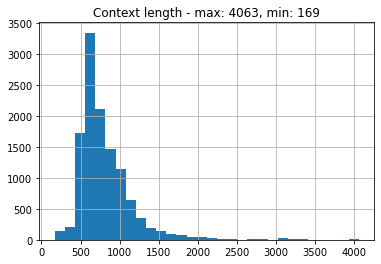

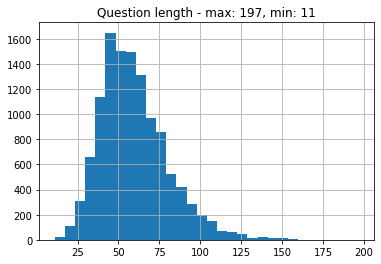

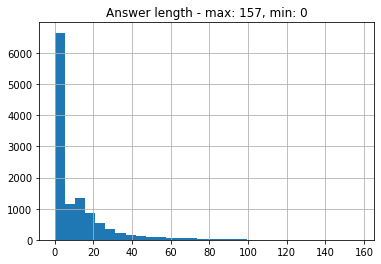

In [35]:
context_length_max = length_df['context_length'].max()
context_length_min = length_df['context_length'].min()
plt.title(f'Context length - max: {context_length_max}, min: {context_length_min}')
length_df['context_length'].hist(bins=30)
plt.show()

question_length_max = length_df['question_length'].max()
question_length_min = length_df['question_length'].min()
plt.title(f'Question length - max: {question_length_max}, min: {question_length_min}')
length_df['question_length'].hist(bins=30)
plt.show()

answer_length_max = int(length_df['answer_mean_length'].max())
answer_length_min = int(length_df['answer_mean_length'].min())
plt.title(f'Answer length - max: {answer_length_max}, min: {answer_length_min}')
length_df['answer_mean_length'].hist(bins=30)
plt.show()

In [36]:
length_df.head()

,id,context_length,question_length,answer_mean_length
0,56ddde6b9a695914005b9628,742,36,6.00
1,56ddde6b9a695914005b9629,742,34,24.75
2,56ddde6b9a695914005b962a,742,45,27.00
3,56ddde6b9a695914005b962b,742,25,5.00
4,56ddde6b9a695914005b962c,742,64,13.50


In [37]:
length_df['context_length_bin'] = pd.cut(length_df['context_length'], bins=5).astype(str)
length_df['question_length_bin'] = pd.cut(length_df['question_length'], bins=5).astype(str)
length_df['answer_mean_length_bin'] = pd.cut(length_df['answer_mean_length'], bins=5).astype(str)

In [38]:
length_df.head()

,id,context_length,question_length,answer_mean_length,context_length_bin,question_length_bin,answer_mean_length_bin
0,56ddde6b9a695914005b9628,742,36,6.00,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 31.467]"
1,56ddde6b9a695914005b9629,742,34,24.75,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 31.467]"
2,56ddde6b9a695914005b962a,742,45,27.00,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 31.467]"
3,56ddde6b9a695914005b962b,742,25,5.00,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 31.467]"
4,56ddde6b9a695914005b962c,742,64,13.50,"(165.106, 947.8]","(48.2, 85.4]","(-0.157, 31.467]"


In [39]:
length_df.drop(columns=['context_length', 'question_length', 'answer_mean_length'], inplace=True)

## Save

In [40]:
simple_categories_df = w8h_df.merge(length_df, on='id')
print(simple_categories_df.shape)
simple_categories_df.head()

(11873, 5)


,id,w8h_label,context_length_bin,question_length_bin,answer_mean_length_bin
0,56ddde6b9a695914005b9628,what,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 31.467]"
1,56ddde6b9a695914005b9629,when,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 31.467]"
2,56ddde6b9a695914005b962a,which,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 31.467]"
3,56ddde6b9a695914005b962b,was,"(165.106, 947.8]","(10.814, 48.2]","(-0.157, 31.467]"
4,56ddde6b9a695914005b962c,what,"(165.106, 947.8]","(48.2, 85.4]","(-0.157, 31.467]"


In [41]:
simple_categories_df.to_csv('data/processed/squad2_dev_simple_categories.csv', index=False)